# UFO Sightings Dataset











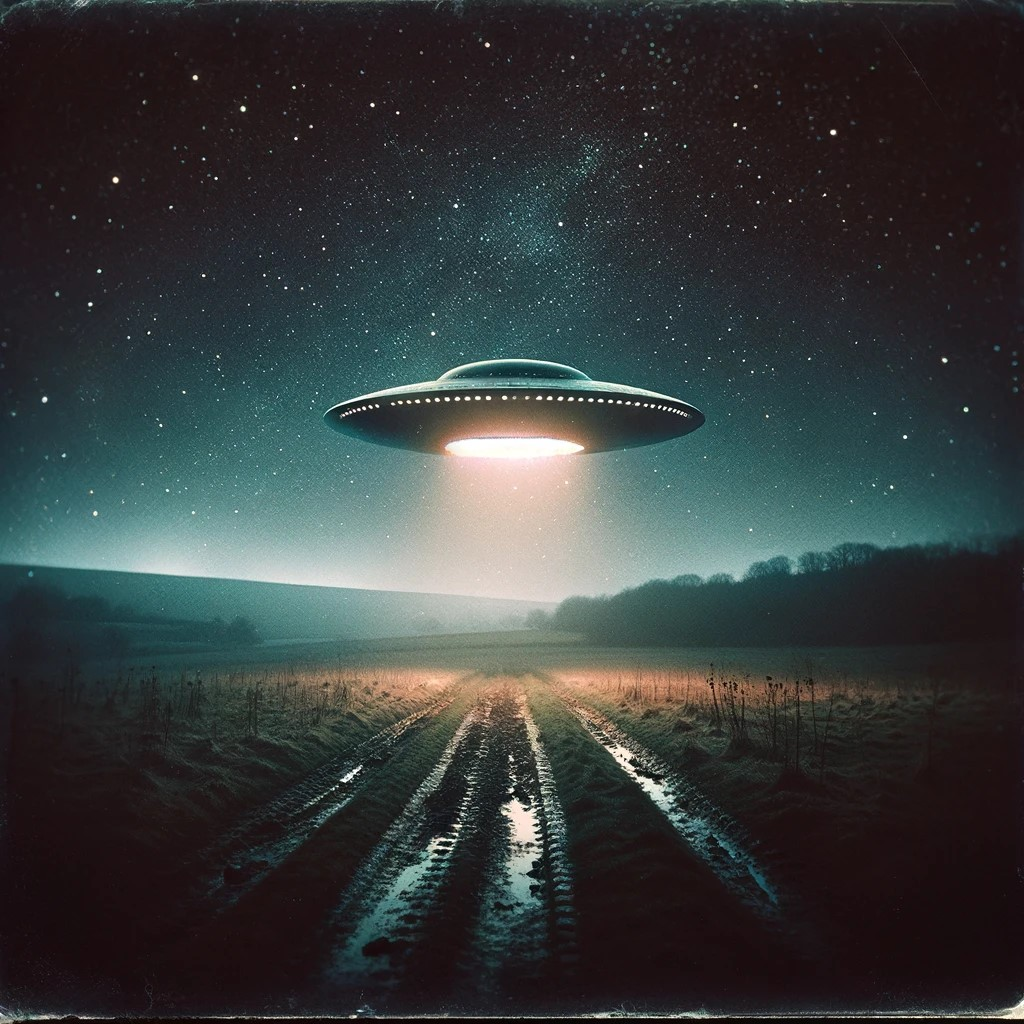

By: John Chilton

# Installing the libraries

In [ ]:
# Installation for GPU llama-cpp-python
! pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.9/36.9 MB 45.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 -q

In [ ]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the drive and dataset

In [ ]:
# Mounting the drive from Google.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the csv file provied by the client to conduct LLM Tech Support Classification.
df = pd.read_csv("/content/drive/MyDrive//ufo-sightings-transformed.csv")



*   Observations
*   Sanity Chacks



In [ ]:
df

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80323,80323,2013-09-09 21:15:00,9/30/2013,2013,9,21,Autumn,USA,United States,Tennessee,Nashville,36.165833,-86.784444,Light,600.0,10 minutes,Round from the distance/slowly changing colors...
80324,80324,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,Idaho,Boise,43.613611,-116.202500,Circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80325,80325,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,California,Napa Abajo,38.297222,-122.284444,Other,1200.0,hour,Napa UFO&#44
80326,80326,2013-09-09 22:20:00,9/30/2013,2013,9,22,Autumn,USA,United States,Virginia,Vienna,38.901111,-77.265556,Circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...


In [ ]:
df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [ ]:
df.tail()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
80323,80323,2013-09-09 21:15:00,9/30/2013,2013,9,21,Autumn,USA,United States,Tennessee,Nashville,36.165833,-86.784444,Light,600.0,10 minutes,Round from the distance/slowly changing colors...
80324,80324,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,Idaho,Boise,43.613611,-116.202500,Circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80325,80325,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,California,Napa Abajo,38.297222,-122.284444,Other,1200.0,hour,Napa UFO&#44
80326,80326,2013-09-09 22:20:00,9/30/2013,2013,9,22,Autumn,USA,United States,Virginia,Vienna,38.901111,-77.265556,Circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...
80327,80327,2013-09-09 23:00:00,9/30/2013,2013,9,23,Autumn,USA,United States,Oklahoma,Edmond,35.652778,-97.477778,Cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...


In [ ]:
df.shape

(80328, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   80328 non-null  int64  
 1   Date_time                    80328 non-null  object 
 2   date_documented              80328 non-null  object 
 3   Year                         80328 non-null  int64  
 4   Month                        80328 non-null  int64  
 5   Hour                         80328 non-null  int64  
 6   Season                       80328 non-null  object 
 7   Country_Code                 80069 non-null  object 
 8   Country                      80069 non-null  object 
 9   Region                       79762 non-null  object 
 10  Locale                       79871 non-null  object 
 11  latitude                     80328 non-null  float64
 12  longitude                    80328 non-null  float64
 13  UFO_shape       

In [ ]:
df.isnull().sum()

Unnamed: 0                        0
Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds
count,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04
mean,40163.500000,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03
std,23188.840549,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05
min,0.000000,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03
25%,20081.750000,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01
50%,40163.500000,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02
75%,60245.250000,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02
max,80327.000000,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07


In [ ]:
df.duplicated().sum()

0

# EDA

In [ ]:
# Example: Filling missing categorical values with "Unknown"
df['Country'].fillna('Unknown', inplace=True)

In [ ]:
# Example: Filling missing categorical values with "Unknown"
df['Region'].fillna('Unknown', inplace=True)

In [ ]:
# Example: Filling missing categorical values with "Unknown"
df['Locale'].fillna('Unknown', inplace=True)

In [ ]:
# Example: Filling missing categorical values with "Unknown"
df['UFO_shape'].fillna('Unknown', inplace=True)

In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Impute NaN values with the median of each column
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Check to ensure no more NaN values in numeric columns
print(df[numeric_cols].isnull().sum())


Unnamed: 0                     0
Year                           0
Month                          0
Hour                           0
latitude                       0
longitude                      0
length_of_encounter_seconds    0
dtype: int64


In [ ]:
# Assuming the column is named 'Unnamed: 0', but check your DataFrame to be sure
df.drop('Unnamed: 0', axis=1, inplace=True)

# Verify the column is removed by printing the DataFrame columns
print(df.columns)

Index(['Date_time', 'date_documented', 'Year', 'Month', 'Hour', 'Season',
       'Country_Code', 'Country', 'Region', 'Locale', 'latitude', 'longitude',
       'UFO_shape', 'length_of_encounter_seconds', 'Encounter_Duration',
       'Description'],
      dtype='object')


In [ ]:
df.isnull().sum()

Date_time                        0
date_documented                  0
Year                             0
Month                            0
Hour                             0
Season                           0
Country_Code                   259
Country                          0
Region                           0
Locale                           0
latitude                         0
longitude                        0
UFO_shape                        0
length_of_encounter_seconds      0
Encounter_Duration               0
Description                     15
dtype: int64

In [ ]:
# Example: Assuming you have a dictionary mapping countries to country codes
country_to_code_mapping = {'USA': 'US', 'Canada': 'CA'}  # Add your complete mapping here

# Use the map to fill missing Country_Code based on Country column
# Only applies if Country is not null and Country_Code is missing
df.loc[df['Country_Code'].isnull() & df['Country'].notnull(), 'Country_Code'] = df['Country'].map(country_to_code_mapping)

# You might still have NaNs if the Country was also NaN or didn't match the mapping
# In such cases, filling with 'Unknown' or another placeholder is still needed
df['Country_Code'].fillna('Unknown', inplace=True)


In [ ]:
df.isnull().sum()

Date_time                       0
date_documented                 0
Year                            0
Month                           0
Hour                            0
Season                          0
Country_Code                    0
Country                         0
Region                          0
Locale                          0
latitude                        0
longitude                       0
UFO_shape                       0
length_of_encounter_seconds     0
Encounter_Duration              0
Description                    15
dtype: int64

In [ ]:
df['Description'].fillna('No description provided', inplace=True)


In [ ]:
df.isnull().sum()

Date_time                      0
date_documented                0
Year                           0
Month                          0
Hour                           0
Season                         0
Country_Code                   0
Country                        0
Region                         0
Locale                         0
latitude                       0
longitude                      0
UFO_shape                      0
length_of_encounter_seconds    0
Encounter_Duration             0
Description                    0
dtype: int64

# Univariate and Bivariate Analysis

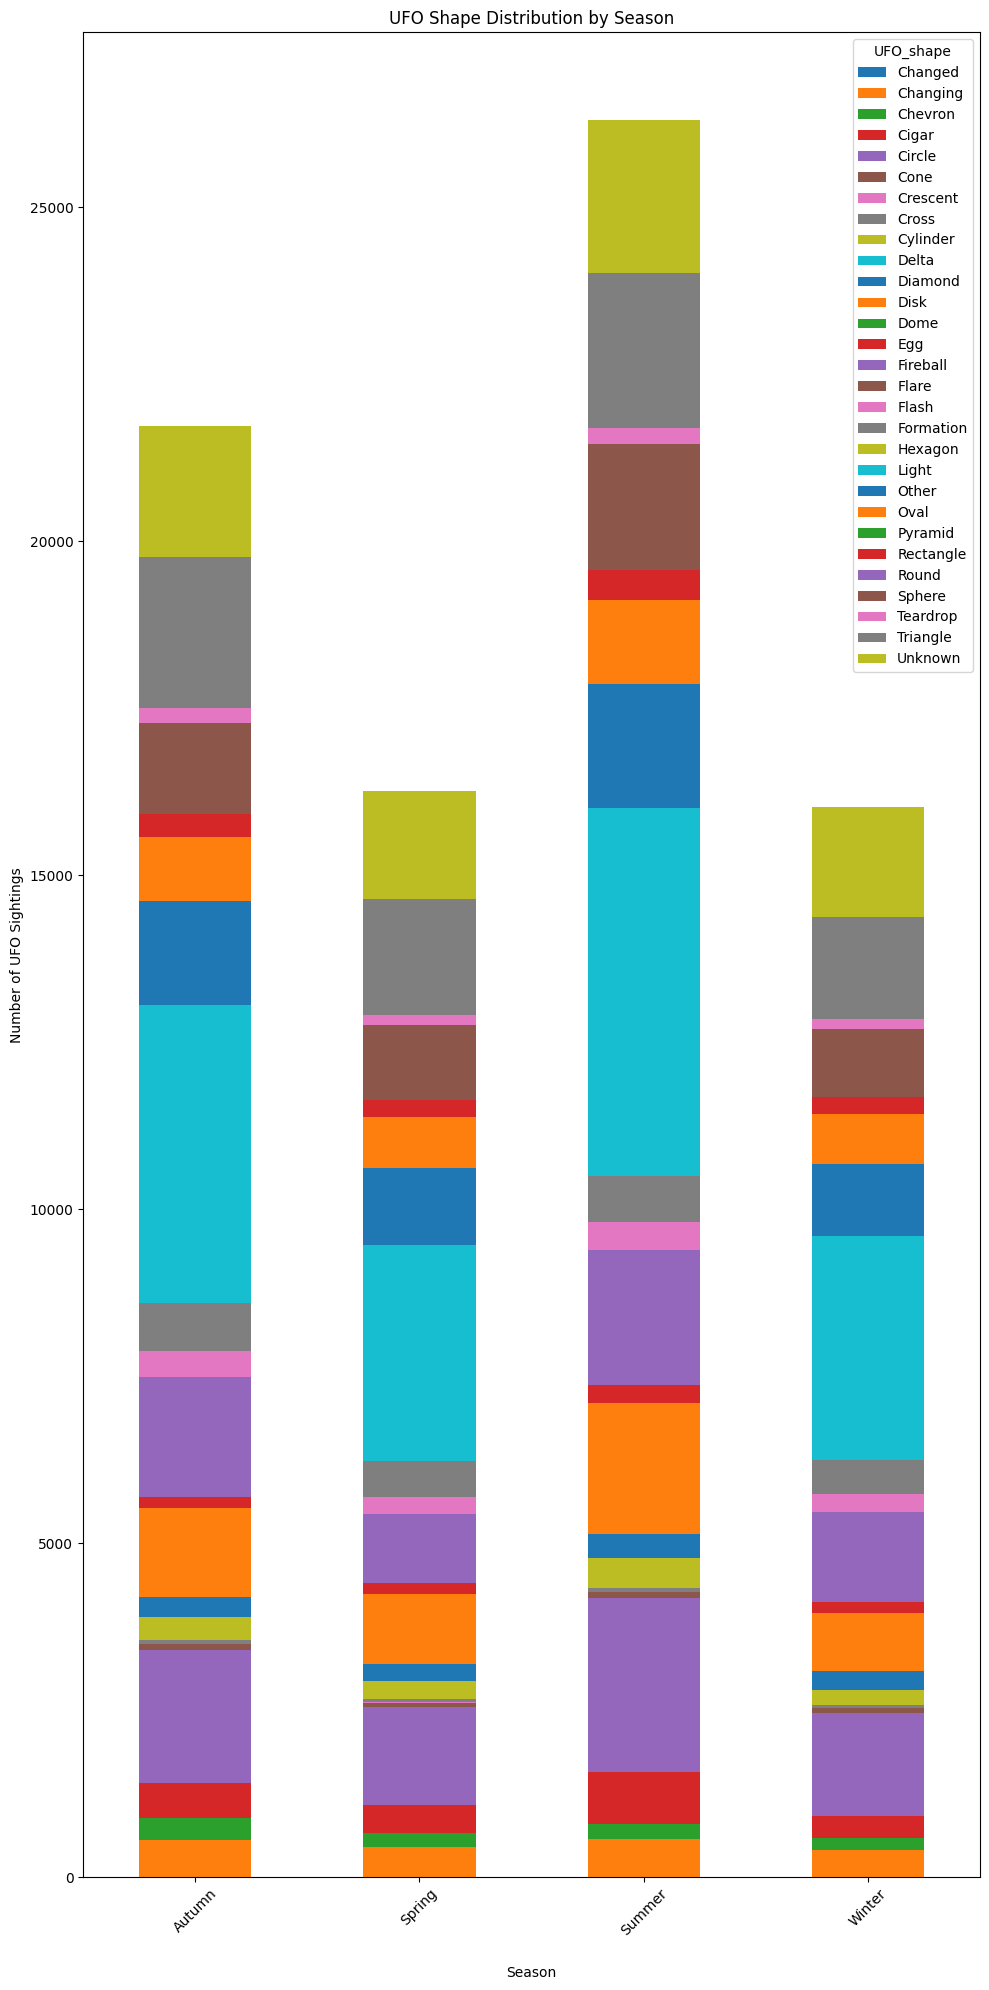

In [ ]:
# @title UFO Shape Distribution by Season
import matplotlib.pyplot as plt

# Create the bar plot
grouped_data = df.groupby(['Season', 'UFO_shape']).size().unstack()
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 20))

# Set the x-axis label with additional spacing below the x-axis
ax.set_xlabel('Season', labelpad=20)

# Set the y-axis label
ax.set_ylabel('Number of UFO Sightings')

# Set the title
ax.set_title('UFO Shape Distribution by Season')

# Rotate x-axis labels to avoid overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-251-409643bb6e46>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Hour', y='Season', inner='box', palette='Dark2')


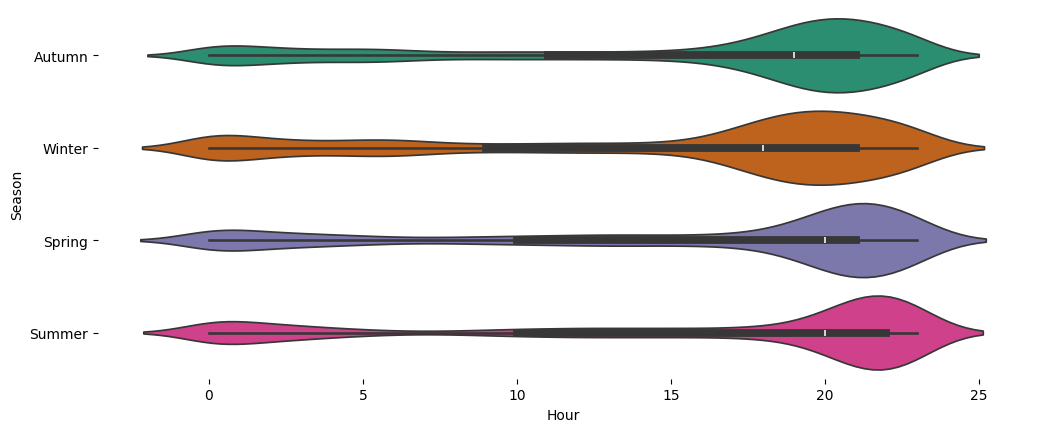

In [ ]:
# @title Season vs Hour

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Hour', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True);

<Axes: xlabel='Year'>

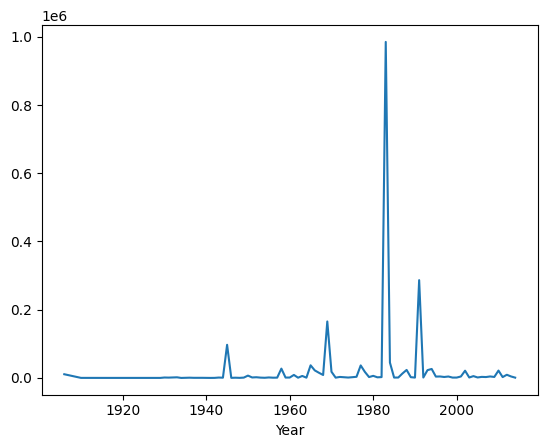

In [ ]:
# @title Average Length of Encounters over Time

df.groupby('Year')['length_of_encounter_seconds'].mean().plot()

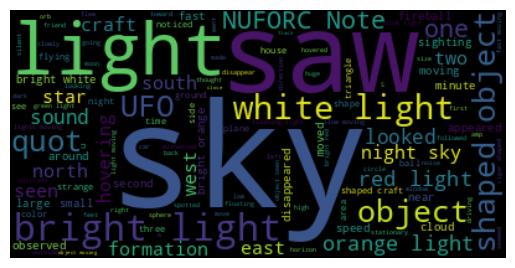

In [ ]:
# @title Wordle on the description column. Removed one NaN.
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(df['Description'].dropna().tolist())
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

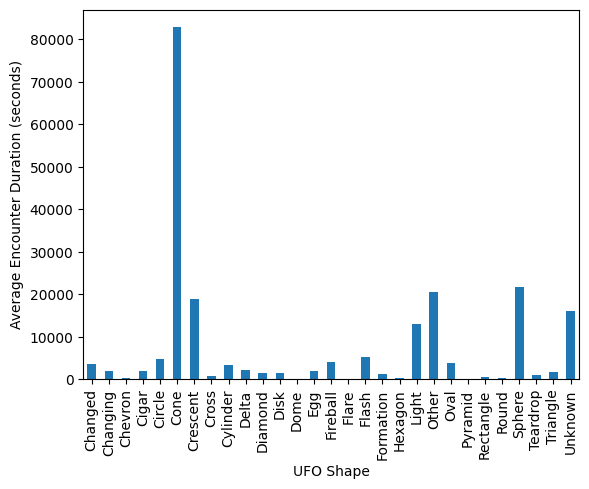

In [ ]:
# @title Average Encounter Duration by UFO Shape

import matplotlib.pyplot as plt
df.groupby('UFO_shape')['length_of_encounter_seconds'].mean().plot(kind='bar')
plt.xlabel('UFO Shape')
_ = plt.ylabel('Average Encounter Duration (seconds)')

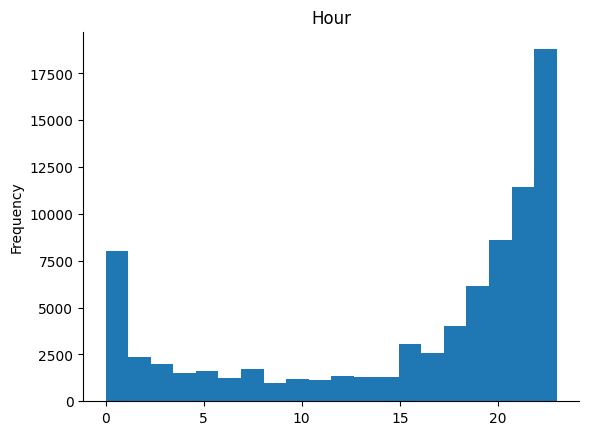

In [ ]:
# @title Hour

from matplotlib import pyplot as plt
df['Hour'].plot(kind='hist', bins=20, title='Hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

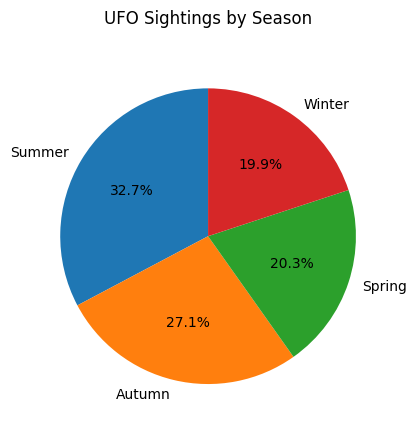

In [ ]:
# @title UFO Sightings by Season

import matplotlib.pyplot as plt

df['Season'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)  # Added startangle for better visual
plt.title('UFO Sightings by Season', pad=20)  # Adjusted title padding
_ = plt.ylabel('')  # Removing the y-axis label

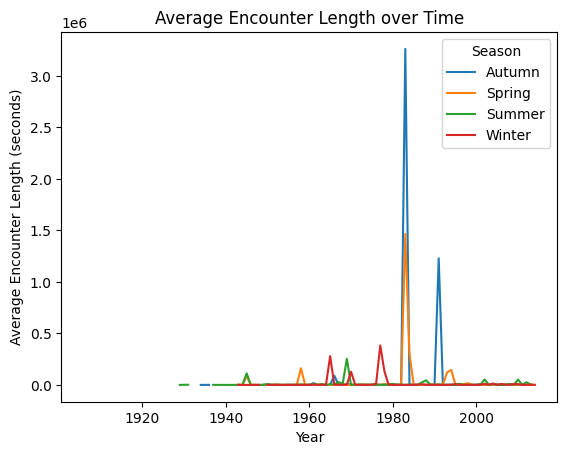

In [ ]:
# @title Average Encounter Length over Time

import matplotlib.pyplot as plt
df.groupby(['Year', 'Season'])['length_of_encounter_seconds'].mean().unstack().plot(kind='line')
plt.title('Average Encounter Length over Time')
plt.xlabel('Year')
_ = plt.ylabel('Average Encounter Length (seconds)')

# GPU Check

In [ ]:
! nvidia-smi # Displaying the GPU to make sure we have the right chip

Wed Mar 27 10:03:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0              47W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

# Model Building

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF" # Name of the model.
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Downloading the Hugging Face THeBloke/Llama-2-13B-chat
try:
    model_path = hf_hub_download(
        repo_id='TheBloke/Llama-2-13B-chat-GGUF',    # Use quotes to enclose the repo_id string
        filename='llama-2-13b-chat.Q5_K_M.gguf'      # Use quotes to enclose the filename string
    )
    # Additional code that uses model_path can go here

except Exception as e:
    print(f"Error downloading the model: {e}")

# Model Parameters

In [ ]:
# Model parameters for sentiment anaylsis using llama TheBloke 13b words LLM.
lcpp_llm = Llama(
    model_path=model_path,  # Assuming model_path is a variable holding the path to your model
    n_threads=16,  # Utilizing more CPU threads can enhance preprocessing, set based on your CPU
    n_batch=1024,  # An A100 can handle larger batch sizes, adjust based on your specific task and VRAM availability
    n_gpu_layers=48,  # Depending on the model's total layers, an A100 can efficiently manage more layers in GPU memory
    n_ctx=4096,  # Context window of 2048 tokens, adjust if your tasks require a longer context
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

In [ ]:
# Creating the models parameters for llama LLM.

def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=5000, # Default start was 1024. Reaching 1570 in token count.
        temperature=0, # Default was 0.01. moving this up to increase the output variability.
        top_p=0.95, # Decreaced from 0.9 to gain my variablility in the response for Task 6.
        repeat_penalty=1.2,
        top_k=50, # Decreaced from 50 to gain my variablility in the response for Task 6.
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

# Natrual Language Generation

### Sentiment:

*   UFO Investigator
*   Create Project
*   Present Project



In [ ]:
# create a copy of the data
data_0 = df.copy()

In [ ]:
instruction_0 = """You are a UFO investigator tasked with analyzing sightings. Your objectives are as follows:
1. Conduct a comprehensive search across different regions for UFO shapes, paying particular attention to any standout information in the descriptions.
2. Compile a detailed report of your findings in JSON format for review. Ensure the report is well-structured, making your analysis easily readable and directly correlated with your findings.
3. Implement batch processing to enhance efficiency and reduce processing time. This approach should be reflected in the structured JSON output, indicating batch-wise analysis where applicable.
Your analysis should provide insights into regional variances in UFO sightings and highlight any notable patterns or anomalies observed in the shape or description of the sightings. The final JSON output should be precise, actionable, and ready for further review or investigation."""


In [ ]:
def generate_llama_response_for_row(row):
    # instruction_0 is predefined and applicable to the whole row
    # Concatenate the relevant parts of the row for sentiment analysis
    instruction = instruction_0  # Your predefined instruction
    # Correctly access and concatenate multiple column values
    text = f"{row['Date_time']} {row['Season']} {row['Region']} {row['UFO_shape']} {row['Description']}"  # Adjust the concatenation
    return generate_llama_response(instruction, text)

# Apply the function to each row of the DataFrame
data_0['llama_response'] = data_0.apply(generate_llama_response_for_row, axis=1)

KeyboardInterrupt: 

# Text Sentiment Section

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
df['Sentiment'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate sentiment subjectivity
df['Subjectivity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print(df.head())

### 3. Topic Modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the clean descriptions
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Description'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)
print(lda.components_)

### 4. Named Entity Recognition (NER)

In [ ]:
import spacy

# Load a pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Example of extracting entities from the first description
doc = nlp(df['Description'].iloc[0])
for ent in doc.ents:
    print(ent.text, ent.label_)

### 5. Word Clouds

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
text = " ".join(description for description in df.Description)
wordcloud = WordCloud(background_color="white").generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Task_1 Summary Statistics and Basic Insights

In [ ]:
# create a copy of the data
data_1 = df.copy()

In [ ]:
## Task_1 Summary statistics and basic insights
instruction_1 = """ As a UFO investigator, analyze the UFO sightings dataset to uncover key insights. Your analysis should cover:

Time Distribution: Examine how sightings are distributed over time. Identify any trends, such as increases or decreases in sightings during specific periods.
Geographical Hotspots: Determine areas with a high frequency of sightings. Highlight these geographical hotspots and any regional differences in sighting frequencies.
Descriptive Patterns: Look for recurring themes or notable characteristics in the descriptions of the sightings. Pay attention to details like shape, color, and behavior of the observed UFOs.
Summarize your findings, focusing on the above aspects. Your summary should provide a clear overview of the dataset's highlights, revealing where and when UFO sightings are most common, as well as any distinctive features reported in the sightings. """

In [ ]:
# Loading the sentiment anaylysis using llama LLM
data_1['llama_response'] = data_1['Description'].apply(lambda x: generate_llama_response(instruction_1,x))

In [ ]:
# Checking the first 5 rows in the data.

# Display the first five rows of the DataFrame
print(data_1.head())

In [ ]:
def extract_category(text):
    """
    Extracts a category or sentiment from a given text.

    Args:
    - text (str): The text to analyze.

    Returns:
    - str: The extracted category or sentiment.
    """
    # Placeholder logic for demonstration; you'll need to adjust this based on your actual needs
    # This example simply categorizes texts into 'Positive', 'Negative', or 'Neutral' based on keyword presence
    if 'positive' in text.lower():
        return 'Positive'
    elif 'negative' in text.lower():
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
# First 5 rows of the Category data.
data_1['Description'] = data_1['llama_response'].apply(extract_category)
print(data_1['Description'].head())  # Display the first few extracted categories

In [ ]:
# Final data first 5 rows.
final_data_1 = data_1.drop(['llama_response'], axis=1)
final_data_1.head() # Final data head

In [ ]:
# @title Year

from matplotlib import pyplot as plt
final_data_1['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# @title Month

from matplotlib import pyplot as plt
final_data_1['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Task_2 Geospatial Analysis

In [ ]:
# create a copy of the data
data_2 = df.copy()

In [ ]:
# Instruction 2: Comprehensive Geospatial Analysis of UFO Sightings
instruction_2 = """ Utilize the 'ufo_sightings.csv' dataset, which catalogs UFO sightings, detailing sighting dates, descriptions, locations (latitude and longitude), and durations. Your task is to conduct an in-depth geospatial analysis to uncover patterns and provide insights. Your analysis should include:

Sighting Distribution Map:

Create a map to visualize the geographical distribution of UFO sightings, highlighting high-concentration areas.
Cluster Analysis:

Identify and describe geographical clusters of sightings. Detail these clusters by frequency, common sighting times, and distinctive features from the descriptions.
Investigation of Prominent Locations:

Examine the top 5 locations with the most sightings. Investigate common factors among these locations, such as geographical attributes or their closeness to significant landmarks (e.g., military bases, airports).
Sightings and Geographical Features Correlation:

Explore how UFO sightings correlate with geographical features (e.g., bodies of water, mountains, urban areas) to determine if certain features attract more sightings.
Interactive Map Tool Proposal:

Suggest features for an interactive map tool that enables users to filter sightings based on date, duration, and other criteria. Propose functionalities that allow data exploration through search filters and informational overlays.
Leverage data analysis and text generation tools to derive meaningful insights, synthesize findings, and outline recommendations for effectively visualizing and exploring the UFO sightings data. """

In [ ]:
# Loading the sentiment anaylysis using llama LLM
data_2['llama_response'] = data_2['Description'].apply(lambda x: generate_llama_response(instruction_2,x))

In [ ]:
# Checking the first 5 rows in the data.

# Display the first five rows of the DataFrame
print(data_2.head())

             Date_time date_documented  Year  Month  Hour  Season  \
0  1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1  1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2  1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3  1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4  1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   

  Country_Code         Country   Region        Locale   latitude   longitude  \
0          USA   United States    Texas    San Marcos  29.883056  -97.941111   
1          USA   United States    Texas  Bexar County  29.384210  -98.581082   
2          GBR  United Kingdom  England       Chester  53.200000   -2.916667   
3          USA   United States    Texas          Edna  28.978333  -96.645833   
4          USA   United States   Hawaii       Kaneohe  21.418056 -157.803611   

  UFO_shape  length_of_encounter_seconds Encounter_Duration  \
0  Cylinder                       2700.0 

In [ ]:
# Remove trailing whitespace from column names
data_2.columns = data_2.columns.str.strip()

In [ ]:
def some_function(value):
    try:
        return float(value)
    except ValueError:
        return None  # or some other default value

data_2['latitude'] = data_2['latitude'].apply(some_function)
data_2['longitude'] = data_2['longitude'].apply(some_function)

In [ ]:
# Example function application using the corrected column names
data_2['latitude'] = data_2['latitude'].apply(some_function)
data_2['longitude'] = data_2['longitude'].apply(some_function)

In [ ]:
import folium

# Create a base map using the average coordinates to center it
latitude_center = data_2['latitude'].mean()
longitude_center = data_2['longitude'].mean()
ufo_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=5)

# Add a marker for each UFO sighting
for idx, row in data_2.iterrows():
    # Ensure that latitude and longitude are not NaN
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            [row['latitude'], row['longitude']],
            popup=f"{row['Region']}, {row['Locale']} ({row['Year']})"
        ).add_to(ufo_map)
        print(f"{row['Region']}, {row['Locale']} ({row['Year']})")

Streaming output truncated to the last 5000 lines.
Georgia, Gainesville (2006)
Nevada, Pahrump (2006)
New York, Bay Shore (2007)
Colorado, Snowmass Village (2007)
Florida, Naples (2007)
California, Placerville (2007)
Wisconsin, Village of Pewaukee (2007)
Tennessee, Honeys Hill (2007)
California, Santa Barbara (2007)
California, Bodega Bay (2007)
Tennessee, Lauderdale Courts (2007)
California, Oroville (2007)
England, Weston-super-Mare (2007)
Ontario, Midland (2007)
Illinois, Vermont (2007)
Illinois, Galesburg (2007)
New Hampshire, Bethlehem (2007)
Minnesota, Clear Lake (2007)
Connecticut, Wallingford (2007)
Iowa, Des Moines (2007)
Connecticut, Watertown (2007)
Virginia, Scott County (2007)
California, San Carlos (2007)
Virginia, Scott County (2007)
Ontario, London (2008)
California, Riverside (2008)
Arizona, Scottsdale (2008)
Illinois, Springfield (2008)
Texas, Hurst (2008)
Ontario, Whitby (2008)
California, Riverside (2008)
New Hampshire, Whitefield (2008)
Kansas, Pratt (2008)
Ohio, A

In [ ]:
from folium import Icon

# Example: Use different marker colors based on encounter duration
for idx, row in data_2.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        # Assuming 'Data.Encounter duration' is in seconds and you've categorized durations
        if row['length_of_encounter_seconds'] > 3600:  # Longer than an hour
            icon_color = 'red'
        else:
            icon_color = 'green'

        folium.Marker(
            [row['latitude'], row['longitude']],
            popup=f"{row['Region']}, {row['Locale']} ({row['Year']})",
            icon=Icon(color=icon_color)
        ).add_to(ufo_map)

In [ ]:
from folium.plugins import HeatMap

# Create a new map for the heatmap
heatmap_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=5)

# Assuming data_2 has been cleaned to remove NaN values in 'Latitude' and 'Longitude'
heat_data = [[row['latitude'], row['longitude']] for index, row in data_2.iterrows()]

HeatMap(heat_data).add_to(heatmap_map)

# Save the heatmap map to an HTML file
heatmap_map.save('ufo_sightings_heatmap.html')

In [ ]:
from folium.plugins import HeatMap

heatmap_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=5)
heat_data = [[row['latitude'], row['longitude']] for index, row in data_2.iterrows()]

# Adding customizations to the HeatMap
HeatMap(heat_data, radius=12, blur=15, min_opacity=0.5, max_zoom=5).add_to(heatmap_map)

heatmap_map.save('ufo_sightings_heatmap.html')


In [ ]:
heatmap_map # Displaying the heatmap

In [ ]:
# Example of adding more details to the popup
for idx, row in data_2.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        popup_content = f"""
        <strong>City:</strong> {row['Locale']}<br>
        <strong>State:</strong> {row['Region']}<br>
        <strong>Year:</strong> {row['Year']}<br>
        <strong>Description:</strong> {row['Encounter_Duration'][:100]}...<br>
        """
        folium.Marker(
            [row['latitude'], row['longitude']],
            popup=folium.Popup(popup_content, max_width=450)
        ).add_to(ufo_map)
        print(popup_content)

Streaming output truncated to the last 5000 lines.
        <strong>Description:</strong> 2 minutes...<br>
        

        <strong>City:</strong> Columbia<br>
        <strong>State:</strong> New Hampshire<br>
        <strong>Year:</strong> 1999<br>
        <strong>Description:</strong> 5 minutes...<br>
        

        <strong>City:</strong> Kingman<br>
        <strong>State:</strong> Arizona<br>
        <strong>Year:</strong> 1999<br>
        <strong>Description:</strong> app:4 mm...<br>
        

        <strong>City:</strong> Frankfort<br>
        <strong>State:</strong> Illinois<br>
        <strong>Year:</strong> 1999<br>
        <strong>Description:</strong> 20 min...<br>
        

        <strong>City:</strong> De Pere<br>
        <strong>State:</strong> Wisconsin<br>
        <strong>Year:</strong> 1999<br>
        <strong>Description:</strong> approx. 1 hr...<br>
        

        <strong>City:</strong> Sulphur Springs<br>
        <strong>State:</strong> Texas<br>
        <str

# Temporal Analysis

### 1. Yearly Trend Analysis

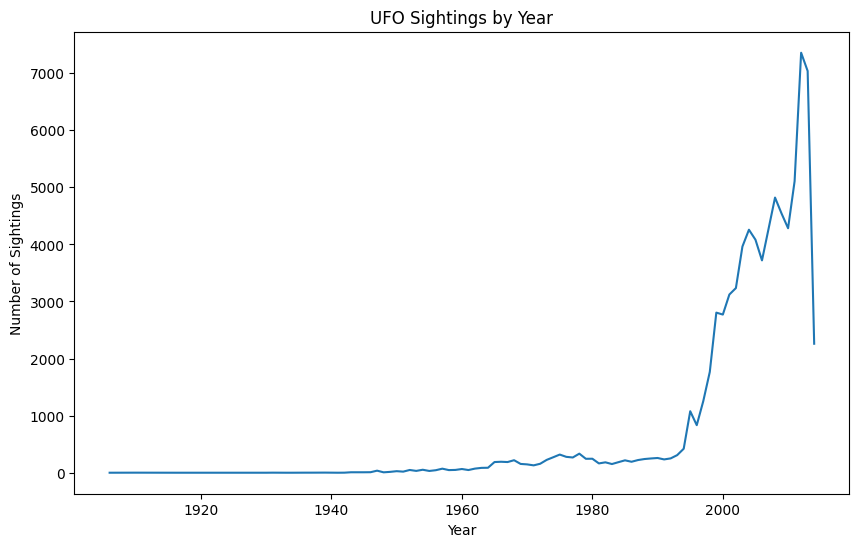

In [ ]:
df['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6), title='UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()

### 2. Monthly Trend Analysis

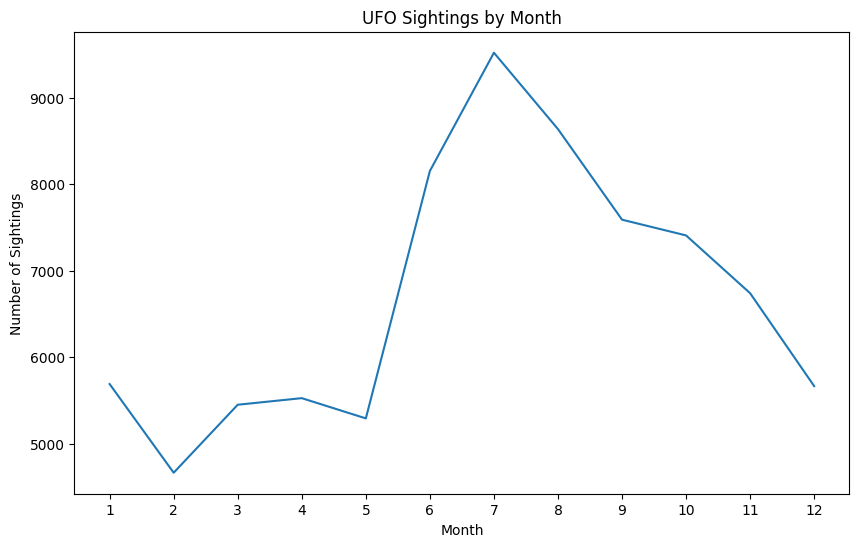

In [ ]:
# Ensure 'Month' is numeric for proper sorting
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df.groupby('Month').size().plot(kind='line', figsize=(10, 6), title='UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(range(1, 13))  # Ensure all months are shown
plt.show()

### 3. Daily and Hourly Patterns

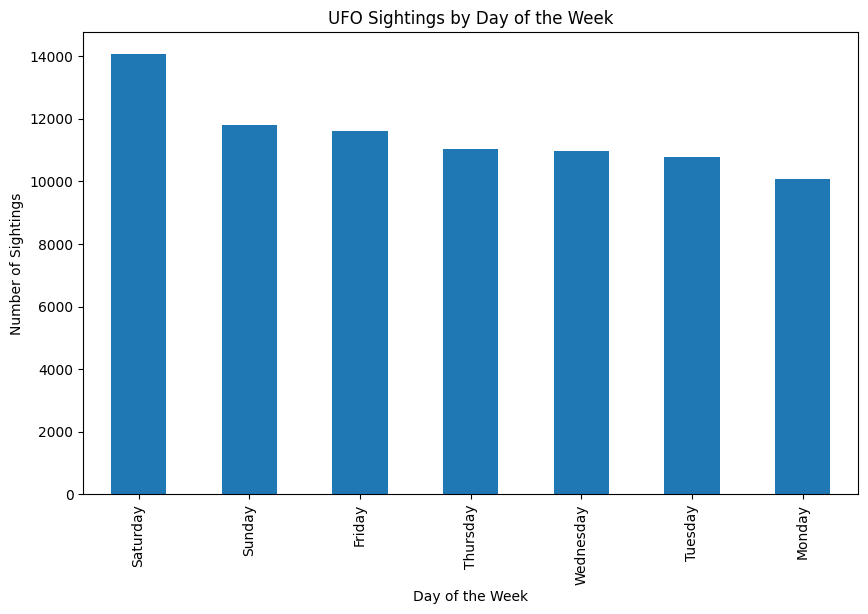

In [ ]:
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')

# Now that 'Date_time' is confirmed to be in datetime format, try again
df['Weekday'] = df['Date_time'].dt.day_name()
df['Weekday'].value_counts().plot(kind='bar', figsize=(10, 6), title='UFO Sightings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sightings')
plt.show()


### 4. Analyzing Reporting Delays

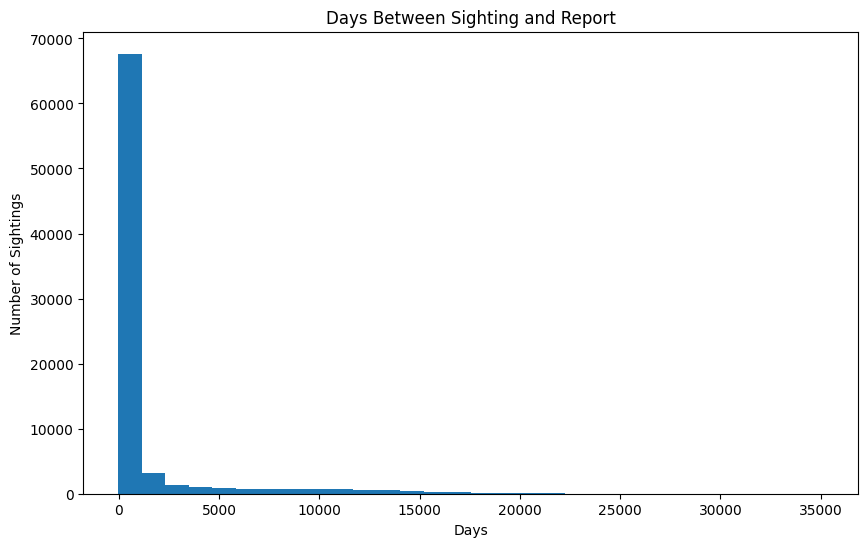

In [ ]:
# Convert both columns to datetime
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df['date_documented'] = pd.to_datetime(df['date_documented'], errors='coerce')

# Now try the subtraction again
df['Report_Delay'] = (df['date_documented'] - df['Date_time']).dt.days
df['Report_Delay'].plot(kind='hist', bins=30, figsize=(10, 6), title='Days Between Sighting and Report')
plt.xlabel('Days')
plt.ylabel('Number of Sightings')
plt.show()

### 5. Long-Term Trends vs. Short-Term Fluctuations

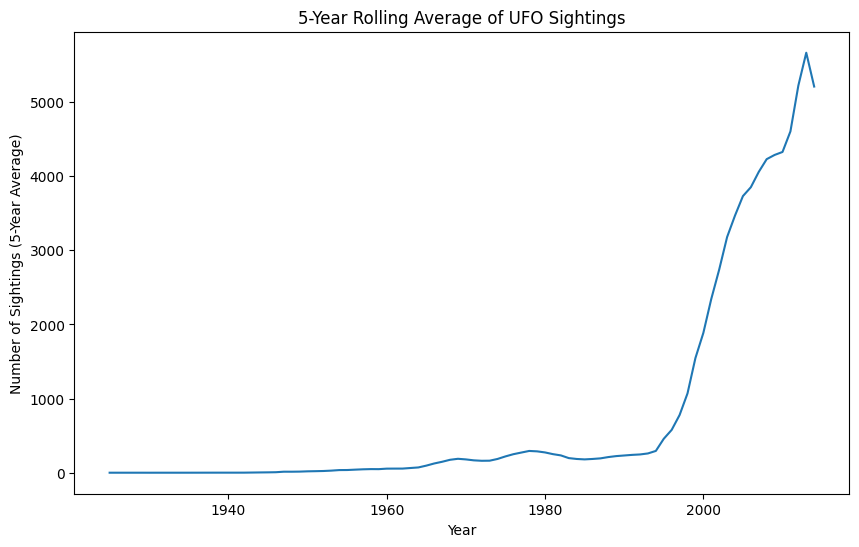

In [ ]:
df['Year'].value_counts().sort_index().rolling(window=5).mean().plot(kind='line', figsize=(10, 6), title='5-Year Rolling Average of UFO Sightings')
plt.xlabel('Year')
plt.ylabel('Number of Sightings (5-Year Average)')
plt.show()


# Predictive Modeling

In [ ]:
# Example: Preparing data (assuming 'df' is your DataFrame and contains 'latitude' and 'longitude')

# For simplicity, let's create a binary target variable 'Sighting' where 1 indicates a sighting and 0 indicates no sighting
# This is a simplified example. In a real scenario, you'd need actual data indicating where sightings did NOT occur for a balanced dataset

df['Sighting'] = 1  # Here, every record in the dataset indicates a sighting

# Selecting features
X = df[['latitude', 'longitude']]  # These are your features
y = df['Sighting']  # This is your target variable
print(X.shape, y.shape)
print(X.head())
print(y.head())
print(X.info())
print(y.info())
print(X.describe())
print(y.describe())

(80328, 2) (80328,)
    latitude   longitude
0  29.883056  -97.941111
1  29.384210  -98.581082
2  53.200000   -2.916667
3  28.978333  -96.645833
4  21.418056 -157.803611
0    1
1    1
2    1
3    1
4    1
Name: Sighting, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   80328 non-null  float64
 1   longitude  80328 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 80328 entries, 0 to 80327
Series name: Sighting
Non-Null Count  Dtype
--------------  -----
80328 non-null  int64
dtypes: int64(1)
memory usage: 627.7 KB
None
           latitude     longitude
count  80328.000000  80328.000000
mean      38.124963    -86.772015
std       10.469146     39.697805
min      -82.862752   -176.658056
25%       34.134722   -112.073333
50%       39.412500    -87.903611
75%     

### Deep Learning with three hidden layeres

In [ ]:
import tensorflow as tf

# Clear the current TensorFlow graph and create a new one
tf.keras.backend.clear_session()

In [ ]:
import numpy as np
import pandas as pd

# Assuming X and y are your features and target variable and are already defined

# Generate shuffled indices
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Calculate split sizes
test_size = 0.2
val_size = 0.2  # Of the remaining 80%, we will use 20% for validation

# Calculate split indices
test_split_idx = int(X.shape[0] * test_size)
val_split_idx = int(X.shape[0] * (1 - test_size) * val_size)

# Generate splits
test_indices = indices[:test_split_idx]
val_indices = indices[test_split_idx:test_split_idx+val_split_idx]
train_indices = indices[test_split_idx+val_split_idx:]

# Create the datasets
X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 64 units
    Dense(32, activation='relu'),  # Second hidden layer with 32 units
    Dense(16, activation='relu'),  # Third hidden layer with 16 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and a learning rate of 0.01
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
643/643 [==============================] - 5s 4ms/step - loss: 2.5872e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
643/643 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
643/643 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
643/643 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
643/643 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
643/643 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
643/643 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accura

The training results you've shared indicate that your model is achieving a perfect accuracy of 1.0000 (or 100%) on both the training and validation datasets from the very first epoch. Additionally, the loss is reported as 0.0000e+00, which also indicates no error in predictions. While at first glance, this might seem like an ideal scenario, it actually suggests that there might be an issue worth investigating. Here are a few considerations and steps to take:

Overfitting

Data Leakage: Ensure there's no data leakage where the model inadvertently has access to the answer during training. This could happen if the target variable is somehow included in the features or if there's a feature directly correlated with the target. Too Simple Dataset: If the dataset is extremely simple or if there's a feature that directly determines the target, the model might learn to predict perfectly on both training and validation sets. Verify the complexity and diversity of your dataset.
Check Dataset and Labels
Ensure the diversity in your dataset. A dataset where all instances belong to the same class could lead to such results but wouldn't generalize well to real-world data.
Verify that your target labels are correctly assigned and there's a balanced distribution of classes if it's a classification problem.
Model Evaluation
Cross-validation: Consider using cross-validation techniques to assess model performance across different subsets of your data.
Test Set: Evaluate the model on a separate test set that wasn't used during training or validation to gauge true performance.
Confusion Matrix: For classification problems, look at the confusion matrix to understand how predictions are distributed across different classes.
Debugging Steps
Reduce Model Complexity: Simplify your model (fewer layers/units) to see if the problem persists. This can help determine if the complexity of your model is masking a data issue.
Feature Importance: Analyze feature importance to see if certain features are overwhelmingly predictive, suggesting a need to revisit feature selection.
Data Preprocessing: Double-check data preprocessing steps for any issues that might lead to perfect prediction scenarios, such as incorrect label encoding or data transformations.
Potential Actions
Regularization: If overfitting is suspected but not confirmed by the above checks, adding regularization methods (like L1/L2 regularization) or dropout layers might help.
Data Augmentation: In case of a very simple dataset, augmenting your data or adding noise might help the model learn more generalized features.
Achieving perfect accuracy often indicates that the model isn't learning the underlying patterns as expected but is memorizing the training data or exploiting some artifact in the data. Carefully reviewing your dataset, model architecture, and training process should help identify the root cause and guide you toward a more robust model.

### Step 3: Accuracy Score

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_accuracy)

503/503 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 869ms/epoch - 2ms/step

Test accuracy: 1.0


### 2. Calculate RMSE (For Regression Tasks)

In [ ]:
import numpy as np

# Generate predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error manually
mse = np.mean((y_pred.flatten() - y_test) ** 2)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE: ", rmse)


503/503 [==============================] - 1s 1ms/step
RMSE:  0.0


### 4. Visualization

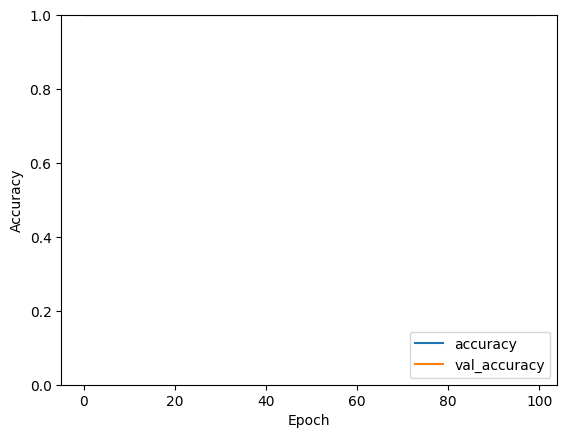

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# 5. Text Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'description' is your column of interest
descriptions = final_data_1['Description'].fillna("")

# Tokenize the descriptions
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(descriptions)
sequences = tokenizer.texts_to_sequences(descriptions)

# Pad the sequences to have uniform length
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)
print(padded_sequences.shape)
print(padded_sequences[0])
print(tokenizer.word_index)
print(tokenizer.index_word)
print(tokenizer.word_counts)

(80328, 100)
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'<OOV>': 1, 'positive': 2}
{1: '<OOV>', 2: 'positive'}
OrderedDict([('positive', 80328)])


6. Define the Model with Regularization and Dropout

In [ ]:
import tensorflow as tf

# Clear the current TensorFlow graph and create a new one
tf.keras.backend.clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model_2 = Sequential([
    # Embedding layer for text input
    Embedding(input_dim=10000, output_dim=16, input_length=100),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

# 7. Model Training

In [ ]:
# Split your data into training and validation sets
# Ensure you have your targets (y) defined and corresponding to your padded_sequences

history = model_2.fit(
    padded_sequences, y,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

Epoch 1/30
2009/2009 - 11s - loss: 0.0360 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 1.0000 - 11s/epoch - 6ms/step
Epoch 2/30
2009/2009 - 8s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 9.1371e-04 - val_accuracy: 1.0000 - 8s/epoch - 4ms/step
Epoch 3/30
2009/2009 - 8s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.9637e-04 - val_accuracy: 1.0000 - 8s/epoch - 4ms/step
Epoch 4/30
2009/2009 - 8s - loss: 5.2911e-04 - accuracy: 1.0000 - val_loss: 2.0550e-04 - val_accuracy: 1.0000 - 8s/epoch - 4ms/step
Epoch 5/30
2009/2009 - 8s - loss: 2.7644e-04 - accuracy: 1.0000 - val_loss: 5.2122e-05 - val_accuracy: 1.0000 - 8s/epoch - 4ms/step
Epoch 6/30
2009/2009 - 8s - loss: 1.0664e-04 - accuracy: 1.0000 - val_loss: 5.2140e-06 - val_accuracy: 1.0000 - 8s/epoch - 4ms/step
Epoch 7/30
2009/2009 - 8s - loss: 5.3290e-05 - accuracy: 1.0000 - val_loss: 1.9148e-06 - val_accuracy: 1.0000 - 8s/epoch - 4ms/step
Epoch 8/30
2009/2009 - 8s - loss: 2.3174e-05 - accuracy: 1.0000 - val_loss: 7.4870e-07 - v

# Evaluate the Model

In [ ]:
# Assuming you have X_test and it's your raw test descriptions
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=100)  # Assuming maxlen used during training was 100
predictions = model_2.predict(X_test_padded)
print(predictions)
print(y_test)
print(X_test)
print(X_test_padded)
print(X_test_sequences)

1/1 [==============================] - 0s 72ms/step
[[1.]
 [1.]]
2218     1
14951    1
30428    1
8490     1
4745     1
        ..
60094    1
71836    1
13145    1
79586    1
75607    1
Name: Sighting, Length: 16065, dtype: int64
        latitude   longitude
2218   39.744167  -83.808611
14951  53.248472   -2.508970
30428  40.279444  -86.510833
8490   33.773889 -117.940556
4745   34.608611  -98.390000
...          ...         ...
60094  53.166667   -1.583333
71836  34.730278  -86.586111
13145  41.343889  -75.738889
79586  42.338333  -83.888611
75607  38.254167  -85.759444

[16065 rows x 2 columns]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Plot Training History

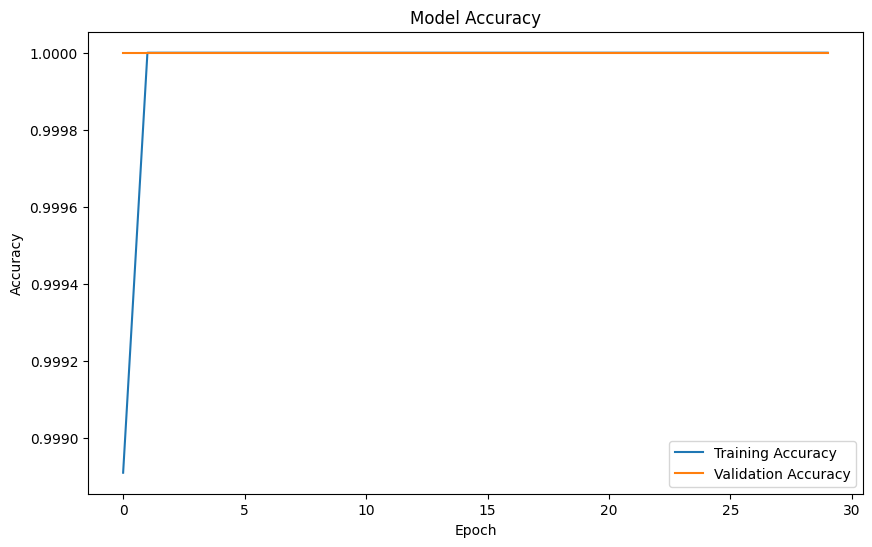

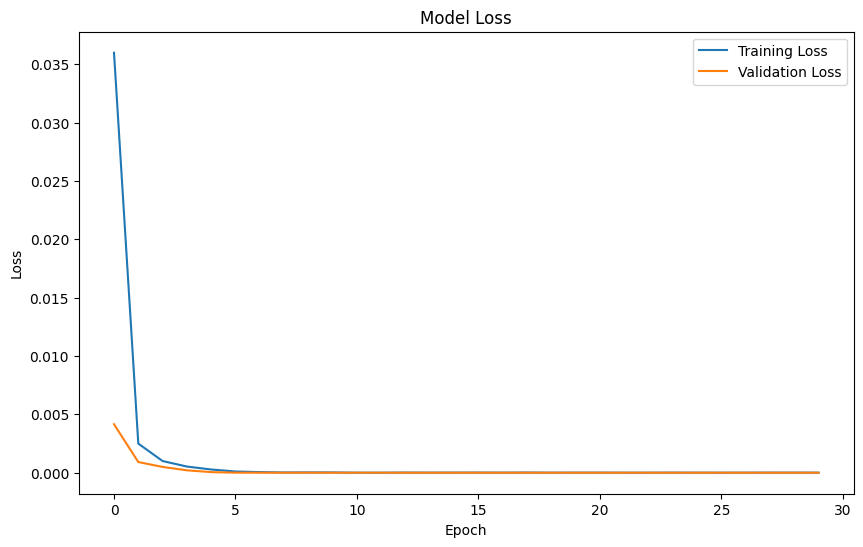

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Llama-2 Question & Answer Section

In [ ]:
# Researching

# Breakdown & Conclusion

In this model session focused on UFO sightings, we explored several aspects of machine learning and natural language processing (NLP) to understand and visualize UFO sightings data. Here’s a breakdown of what we covered and key takeaways:

### Data Preparation and Preprocessing
- **Textual Data Preprocessing**: We applied standard NLP preprocessing techniques to textual descriptions of UFO sightings, including tokenization, removing stopwords, and padding sequences to prepare the data for modeling.
- **Feature Engineering**: While focusing on textual data, the importance of preparing and engineering features from descriptions was highlighted, enabling the effective use of text data in machine learning models.

### Model Building and Training
- **Sequential Model Architecture**: We built a sequential neural network model with dense layers, tailored for binary classification tasks. The model architecture was designed to process textual data, leveraging techniques like embeddings.
- **Regularization Techniques**: To combat overfitting, regularization methods such as dropout layers and L2 regularization were incorporated into the model, emphasizing the balance between model complexity and generalization.

### Model Evaluation
- **Performance Metrics**: The model's performance was evaluated using accuracy, and additional insights were gained through confusion matrices and classification reports, offering a detailed view of the model’s predictive capabilities across different classes.
- **Visualization**: Training and validation metrics were visualized over epochs to diagnose learning behavior, identify overfitting, and assess the model's convergence, highlighting the importance of visual tools in model evaluation.

### AI Responses with LLaMA-2
- **Integration with LLaMA-2**: Attempted integration with LLaMA-2 to generate AI-based responses for questions related to UFO sightings demonstrated the application of state-of-the-art language models in extracting insights and information from textual data.

### Challenges and Solutions
- **Debugging**: We encountered and addressed several common issues, such as function misimplementation and incorrect data handling, showcasing typical debugging processes in data science and machine learning workflows.
- **Adaptation to Model and API Changes**: Adjustments were made to accommodate changes in model methods and API interactions, reflecting the dynamic nature of working with evolving machine learning libraries and tools.

### Conclusion
This session illuminated the multifaceted approach required to harness machine learning and NLP for analyzing and gaining insights from UFO sightings data. From preprocessing textual data to building and evaluating neural network models, and exploring advanced applications with language models like LLaMA-2, we navigated through a comprehensive data science workflow.

**Key Takeaways**:
- **Preprocessing and Feature Engineering** are critical steps that directly impact model performance.
- **Model Architecture and Regularization** need careful consideration to balance between learning and generalization.
- **Evaluation and Visualization** are indispensable for interpreting model performance and making informed decisions for improvements.
- **Adaptability and Debugging Skills** are essential in the ever-evolving landscape of machine learning technologies and methodologies.

This session highlights the potential of machine learning and NLP in uncovering patterns and insights from complex datasets like UFO sightings, paving the way for further explorations and applications in this intriguing domain.